In [1]:
# Import necessary packages
from neurodsp.sim.combined import sim_combined
from neurodsp.spectral import compute_spectrum
from neurodsp.sim import sim_powerlaw, sim_oscillation
from fooof import FOOOF
from fooof.plts.fm import plot_fm
from fooof.plts import plot_spectra
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Overparameterizing alpha

### Simulate bursty oscillation with aperiodic activity

In [4]:
# Set parameters
n_seconds = 3
fs = 1000

# Define the components of the combined signal to simulate
components = {'sim_powerlaw' : {'exponent': -2},
              'sim_bursty_oscillation' : {'freq' : 12.5, 'burst_params': {
                'enter_burst': 0.1, 'leave_burst': 0.9}}}
component_variances = [1, 0.25]

# Simulate a bursty oscillation combined with aperiodic activity
sig = sim_combined(n_seconds, fs, components, component_variances)

/usr/local/anaconda3/envs/voytek/lib/python3.9/site-packages/neurodsp/sim/utils.py:104: RuntimeWarning: invalid value encountered in reciprocal
  mask = (np.abs(freqs) / f_rotation)**-delta_exponent


### Plot alpha oscillatory parameters

ValueError: x and y must have same first dimension, but have shapes (501,) and (1,)

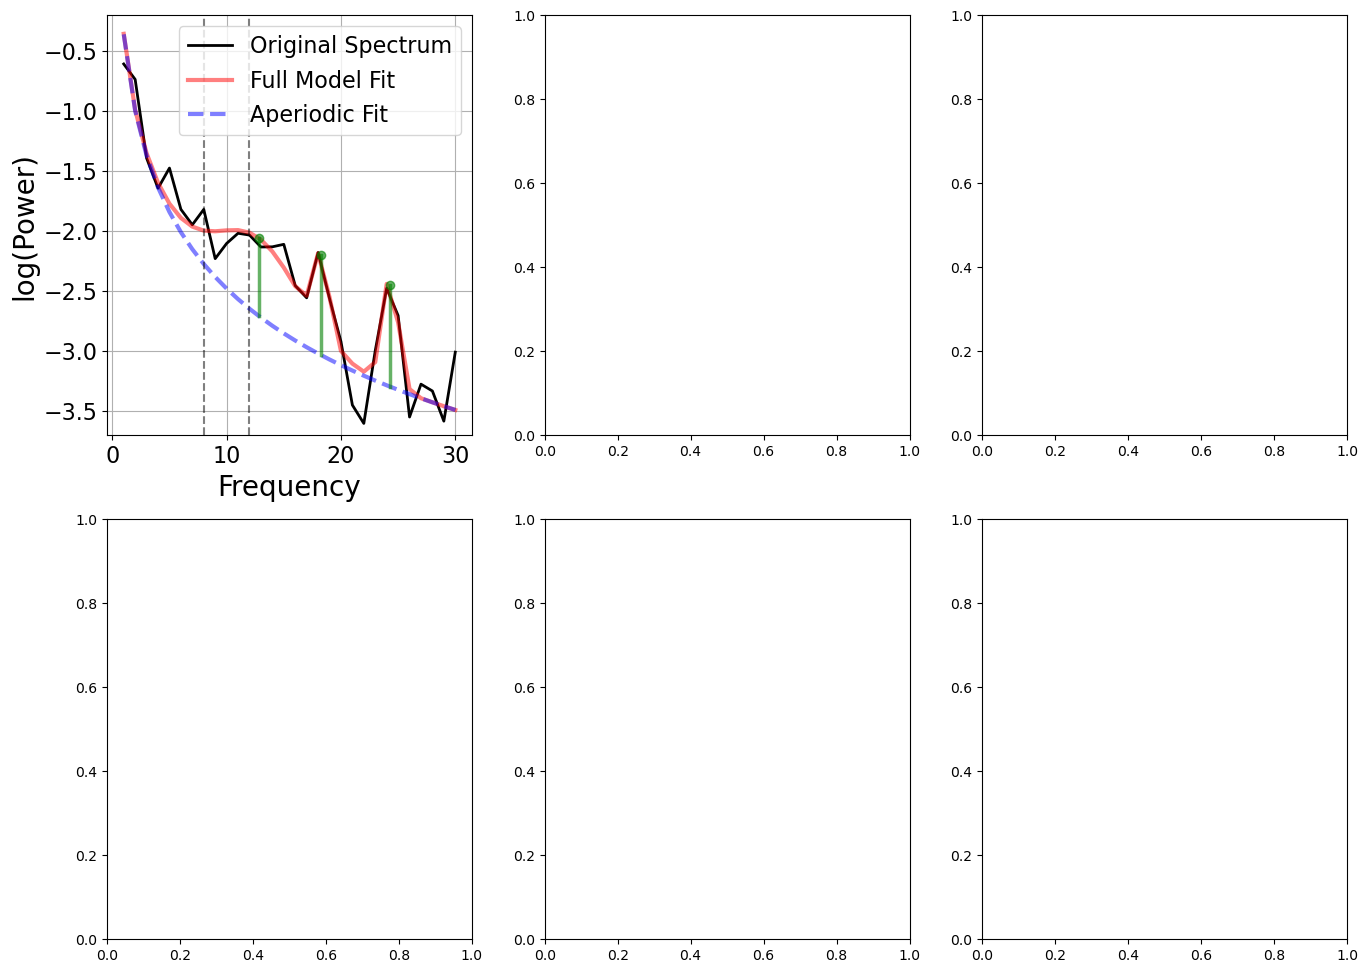

In [3]:
freqs, powers = compute_spectrum(sig, fs)

fm = FOOOF(verbose=False, max_n_peaks=3)
fm.fit(freqs, powers, freq_range=[1, 30])

fig, axes = plt.subplots(2, 3, figsize=(16, 12))

# No FOOOF peak found
plot_fm(fm, ax=axes[0, 0], plot_peaks='dot')
axes[0, 0].axvline(8, color='k', linestyle='--', alpha=0.5)
axes[0, 0].axvline(12, color='k', linestyle='--', alpha=0.5)
axes[0, 0].set_ylim([-3.7, -0.2])

# Log AUC
plot_spectra(freqs, powers, freq_range=[1, 30], log_powers=True, ax=axes[0, 1], c='k')
plot_spectra(freqs[1:31], fm._ap_fit, freq_range=[1, 30], ax=axes[0, 1], c='blue', ls='--')
axes[0, 1].axvline(8, color='k', linestyle='--', alpha=0.5)
axes[0, 1].axvline(12, color='k', linestyle='--', alpha=0.5)
axes[0, 1].set_ylim([-3.7, -0.2])
axes[0, 1].fill_between(freqs[8:13], fm._ap_fit[7:12], y2=np.log10(powers[8:13]), color='r', alpha=0.5, label='Log Oscillatory Alpha AUC')
axes[0, 1].fill_between(freqs[8:13], np.repeat(-3.7, 5), y2=np.log10(powers[8:13]), hatch='/', facecolor='w', edgecolor='r', alpha=0.5, label='Log Total Alpha AUC')
axes[0, 1].legend(loc='upper right', fontsize=14)

# Linear AUC
plot_spectra(freqs, powers, freq_range=[1, 30], ax=axes[0, 2], c='k')
plot_spectra(freqs[1:31], 10 ** fm._ap_fit, freq_range=[1, 30], ax=axes[0, 2], c='blue', ls='--')
axes[0, 2].axvline(8, color='k', linestyle='--', alpha=0.5)
axes[0, 2].axvline(12, color='k', linestyle='--', alpha=0.5)
axes[0, 2].set_ylim([0, 0.05])
axes[0, 2].fill_between(freqs[8:13], 10 ** fm._ap_fit[7:12], y2=powers[8:13], color='g', alpha=0.2, label='Linear Oscillatory Alpha AUC')
axes[0, 2].fill_between(freqs[8:13], np.repeat(0, 5), y2=powers[8:13], hatch='/', facecolor='w', edgecolor='g', alpha=0.2, label='Linear Total Alpha AUC')
axes[0, 2].legend(loc='upper right', fontsize=14)

# No FOOOF peak found
plot_fm(fm, ax=axes[1, 0], plot_peaks='dot')
axes[1, 0].axvline(10, color='purple', linestyle='--', alpha=0.5)
axes[1, 0].axvline(14, color='purple', linestyle='--', alpha=0.5)
axes[1, 0].set_ylim([-3.7, -0.2])

# Log AUC
plot_spectra(freqs, powers, freq_range=[1, 30], log_powers=True, ax=axes[1, 1], c='k')
plot_spectra(freqs[1:31], fm._ap_fit, freq_range=[1, 30], ax=axes[1, 1], c='blue', ls='--')
axes[1, 1].axvline(10, color='purple', linestyle='--', alpha=0.5)
axes[1, 1].axvline(14, color='purple', linestyle='--', alpha=0.5)
axes[1, 1].set_ylim([-3.7, -0.2])
axes[1, 1].fill_between(freqs[10:15], fm._ap_fit[9:14], y2=np.log10(powers[10:15]), color='teal', alpha=0.5, label='Log Oscillatory Alpha AUC')
axes[1, 1].fill_between(freqs[10:15], np.repeat(-3.7, 5), y2=np.log10(powers[10:15]), hatch='/', facecolor='w', edgecolor='teal', alpha=0.5, label='Log Total Alpha AUC')
axes[1, 1].legend(loc='upper right', fontsize=14)

# Linear AUC
plot_spectra(freqs, powers, freq_range=[1, 30], ax=axes[1, 2], c='k')
plot_spectra(freqs[1:31], 10 ** fm._ap_fit, freq_range=[1, 30], ax=axes[1, 2], c='blue', ls='--')
axes[1, 2].axvline(10, color='purple', linestyle='--', alpha=0.5)
axes[1, 2].axvline(14, color='purple', linestyle='--', alpha=0.5)
axes[1, 2].set_ylim([0, 0.05])
axes[1, 2].fill_between(freqs[10:15], 10 ** fm._ap_fit[9:14], y2=powers[10:15], color='darkorange', alpha=0.2, label='Linear Oscillatory Alpha AUC')
axes[1, 2].fill_between(freqs[10:15], np.repeat(0, 5), y2=powers[10:15], hatch='/', facecolor='w', edgecolor='darkorange', alpha=0.2, label='Linear Total Alpha AUC')
axes[1, 2].legend(loc='upper right', fontsize=14)

for i in range(2):
    for j in range(3):
        ax = axes[i, j]
        ax.grid(False)
        sns.despine(ax=ax)

## Alpha oscillatory and aperiodic activity

In [5]:
# Set parameters
n_seconds = 100
alpha_freq = 10
fs = 1000
exp = -1
fmax = 100
colors = ('#ff3131', # bright red
          '#c1ff32', # bright lime green
          '#f4db6c', # bright gold
          '#ff66c4', # pink
          '#5271ff', # blue
          '#cb6ce6', # light purple
          '#5ce1e6', # ice blue
          '#00bf63', # green
          )
alpha_amps = (1, 0, 1, 1, 1, 1, 1, 1)
ei_ratios = (1/6, 1/2, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6)
e_exp = -0.7
i_exp = -2
e_color = '#cb2217'
i_color = '#4b66c6'

### Simulate alpha oscillatory activity during eyes closed

In [ ]:
# Simulation for eyes closed
n_populations = 7
closed_sigs = [sim_powerlaw(
    n_seconds, fs, exp + 0.4 * np.random.rand() - 0.2) + sim_oscillation(
        n_seconds, fs, alpha_freq + 2 * np.random.rand() - 1,
        phase=np.random.rand()) for _ in range(n_populations)]
closed_psds = [compute_spectrum(closed_sig, fs) for closed_sig in closed_sigs]

# Make figure
fig = plt.figure(constrained_layout=True, figsize=(6, 6))
gs = fig.add_gridspec(n_populations, 5)
psd_ax1 = fig.add_subplot(gs[0, -1])
for i, (sig, (freqs, psd)) in enumerate(zip(closed_sigs, closed_psds)):
    # Get axes
    ts_ax = fig.add_subplot(gs[i, :-1])
    psd_ax = psd_ax1
    if i > 0:
        psd_ax = fig.add_subplot(gs[i, -1], sharey=psd_ax1)

    # Plot time series
    ts_ax.plot(sig[:fs], color='k')
    ts_ax.axis('off')

    # Plot PSD
    psd_ax.plot(freqs, psd, color='k')
    psd_ax.set_xlim([1, fmax])
    psd_ax.set_xscale('log')
    psd_ax.set_yscale('log')
    psd_ax.set_xticks([], minor=True)
    psd_ax.set_xticks([1, 10, 100], [], minor=False)
    if i == n_populations - 1:
        psd_ax.set_xticks([1, 10, 100], [1, 10, 100], minor=False)
        psd_ax.set_xlabel('Frequency (Hz)', fontsize=12)
    psd_ax.set_yticks([], minor=True)
    psd_ax.set_yticks([], minor=False)
    sns.despine(ax=psd_ax)

plt.savefig('figs/closed.png', dpi=300, bbox_inches='tight')

### Simulate aperiodic activity for complex stimulus

In [ ]:
# Simulations for complex stimulus (i.e. Brad's face)
n_populations = 7
complex_stim_sigs = [sim_powerlaw(
    n_seconds, fs, exp + 0.4 * np.random.rand() - 0.2) for _ in range(
        n_populations)]
complex_stim_psds = [compute_spectrum(sig, fs) for sig in complex_stim_sigs]

# Make figure
fig = plt.figure(constrained_layout=True, figsize=(6, 6))
gs = fig.add_gridspec(n_populations, 5)
psd_ax1 = fig.add_subplot(gs[0, -1])
for i, (sig, (freqs, psd), c) in enumerate(zip(
        complex_stim_sigs, complex_stim_psds, colors[:n_populations])):
    # Get axes
    ts_ax = fig.add_subplot(gs[i, :-1])
    psd_ax = psd_ax1
    if i > 0:
        psd_ax = fig.add_subplot(gs[i, -1], sharey=psd_ax1)

    # Plot time series
    ts_ax.plot(sig[:fs], color=c)
    ts_ax.axis('off')

    # Plot PSD
    psd_ax.plot(freqs, psd, color=c)
    psd_ax.set_xlim([1, fmax])
    psd_ax.set_xscale('log')
    psd_ax.set_yscale('log')
    psd_ax.set_xticks([], minor=True)
    psd_ax.set_xticks([1, 10, 100], [], minor=False)
    if i == n_populations - 1:
        psd_ax.set_xticks([1, 10, 100], [1, 10, 100], minor=False)
        psd_ax.set_xlabel('Frequency (Hz)', fontsize=12)
    psd_ax.set_yticks([], minor=True)
    psd_ax.set_yticks([], minor=False)
    sns.despine(ax=psd_ax)

plt.savefig('figs/complex_stim.png', dpi=300, bbox_inches='tight')

### Simulate selective alpha reduction in working memory

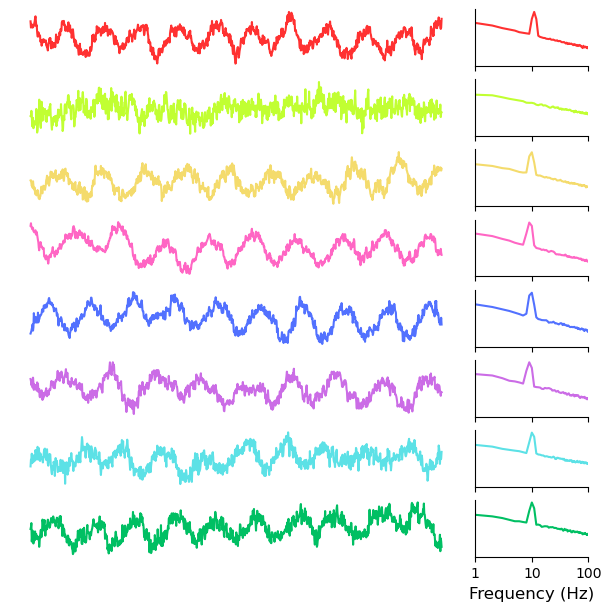

In [6]:
# Simulation for alpha WM
n_populations = 8
alpha_wm_sigs = [sim_powerlaw(
    n_seconds, fs, exp + 0.4 * np.random.rand() - 0.2) + amp * sim_oscillation(
        n_seconds, fs, alpha_freq + 2 * np.random.rand() - 1,
        phase=np.random.rand()) for amp in alpha_amps]
alpha_wm_psds = [compute_spectrum(
    alpha_wm_sig, fs) for alpha_wm_sig in alpha_wm_sigs]

# Make figure
fig = plt.figure(constrained_layout=True, figsize=(6, 6))
gs = fig.add_gridspec(n_populations, 5)
psd_ax1 = fig.add_subplot(gs[0, -1])
for i, (sig, (freqs, psd), c) in enumerate(zip(
        alpha_wm_sigs, alpha_wm_psds, colors)):
    # Get axes
    ts_ax = fig.add_subplot(gs[i, :-1])
    psd_ax = psd_ax1
    if i > 0:
        psd_ax = fig.add_subplot(gs[i, -1], sharey=psd_ax1)

    # Plot time series
    ts_ax.plot(sig[:fs], color=c)
    ts_ax.axis('off')

    # Plot PSD
    psd_ax.plot(freqs, psd, color=c)
    psd_ax.set_xlim([1, fmax])
    psd_ax.set_xscale('log')
    psd_ax.set_yscale('log')
    psd_ax.set_xticks([], minor=True)
    psd_ax.set_xticks([1, 10, 100], [], minor=False)
    if i == n_populations - 1:
        psd_ax.set_xticks([1, 10, 100], [1, 10, 100], minor=False)
        psd_ax.set_xlabel('Frequency (Hz)', fontsize=12)
    psd_ax.set_yticks([], minor=True)
    psd_ax.set_yticks([], minor=False)
    sns.despine(ax=psd_ax)

plt.savefig('figs/alpha_wm.png', dpi=300, bbox_inches='tight')

### Simulate selective shift in exponent (E/I balance)

In [ ]:
# Simulation for selective shift in exponent (E/I balance)
e_sigs = [sim_powerlaw(n_seconds, fs, e_exp) for _ in range(n_populations)]
i_sigs = [sim_powerlaw(n_seconds, fs, i_exp) for _ in range(n_populations)]
exp_sigs = [amp * e_sig + i_sig for amp, e_sig, i_sig in zip(
    ei_ratios, e_sigs, i_sigs)]

# Make figure
fig = plt.figure(constrained_layout=True, figsize=(6, 6))
gs = fig.add_gridspec(n_populations, 15)
psd_ax1 = fig.add_subplot(gs[0, -3:])
for i, (sig, e_sig, i_sig, c) in enumerate(zip(
        exp_sigs, e_sigs, i_sigs, colors)):
    # Get axes
    e_ax = fig.add_subplot(gs[i, :3])
    plus_ax = fig.add_subplot(gs[i, 3])
    i_ax = fig.add_subplot(gs[i, 4:7])
    equals_ax = fig.add_subplot(gs[i, 7])
    ts_ax = fig.add_subplot(gs[i, 8:11])
    psd_ax = psd_ax1
    if i > 0:
        psd_ax = fig.add_subplot(gs[i, -3:], sharey=psd_ax1)

    # Plot excitatory current
    e_ax.plot(e_sig[:np.floor(fs/3).astype(int)], color=e_color)
    e_ax.axis('off')

    # Plot plus sign with no axis
    plus_ax.text(0.5, 0.5, '+', fontsize=20, ha='center', va='center')
    plus_ax.axis('off')

    # Plot inhibitory current
    i_ax.plot(i_sig[:np.floor(fs/3).astype(int)], color=i_color)
    i_ax.axis('off')

    # Plot equals sign with no axis
    equals_ax.text(0.5, 0.5, '=', fontsize=20, ha='center', va='center')
    equals_ax.axis('off')

    # Plot time series
    ts_ax.plot(sig[:np.floor(fs/3).astype(int)], color=c)
    ts_ax.axis('off')

    # Compute PSDs
    freqs, psd = compute_spectrum(sig, fs)
    _, e_psd = compute_spectrum(e_sig, fs)
    _, i_psd = compute_spectrum(i_sig, fs)

    # Normalize offset
    psd = psd / np.max(psd)
    e_psd = e_psd / np.max(e_psd)
    i_psd = i_psd / np.max(i_psd)

    # Plot power spectra
    psd_ax.plot(freqs, psd, color=c)
    psd_ax.plot(freqs, e_psd, color=e_color, ls='--', alpha=0.5)
    psd_ax.plot(freqs, i_psd, color=i_color, ls='--', alpha=0.5)
    psd_ax.set_xlim([1, fmax])
    psd_ax.set_xscale('log')
    psd_ax.set_yscale('log')
    psd_ax.set_xticks([], minor=True)
    psd_ax.set_xticks([1, 10, 100], [], minor=False)
    if i == n_populations - 1:
        psd_ax.set_xticks([1, 10, 100], [1, 10, 100], minor=False)
        psd_ax.set_xlabel('Frequency (Hz)', fontsize=12)
    psd_ax.set_yticks([], minor=True)
    psd_ax.set_yticks([], minor=False)
    sns.despine(ax=psd_ax)

plt.savefig('figs/exp.png', dpi=300, bbox_inches='tight')